# Média Móvel para Detectar Variação em Ações no Tempo
Prof. Fernando Amaral

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "c:\Users\lucas.souza\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_

AttributeError: _ARRAY_API not found

In [12]:
stock = pd.read_csv("../../Dados/all-stocks-2006-01-01-to-2018-01-01.csv",index_col='Date', parse_dates=['Date'])

In [13]:
stock.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [14]:
# Apenas ações do Google
g_stk = stock.query('Name == "GOOGL"')

In [15]:
g_stk.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [16]:
#copia porque  g_stk é um slice de outro dataframe (warning)
g_stk = g_stk.copy()
#adiciona coluna ticks
g_stk['Ticks'] = range(0, len(g_stk))

In [17]:
g_stk.head()

,Open,High,Low,Close,Volume,Name,Ticks
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4


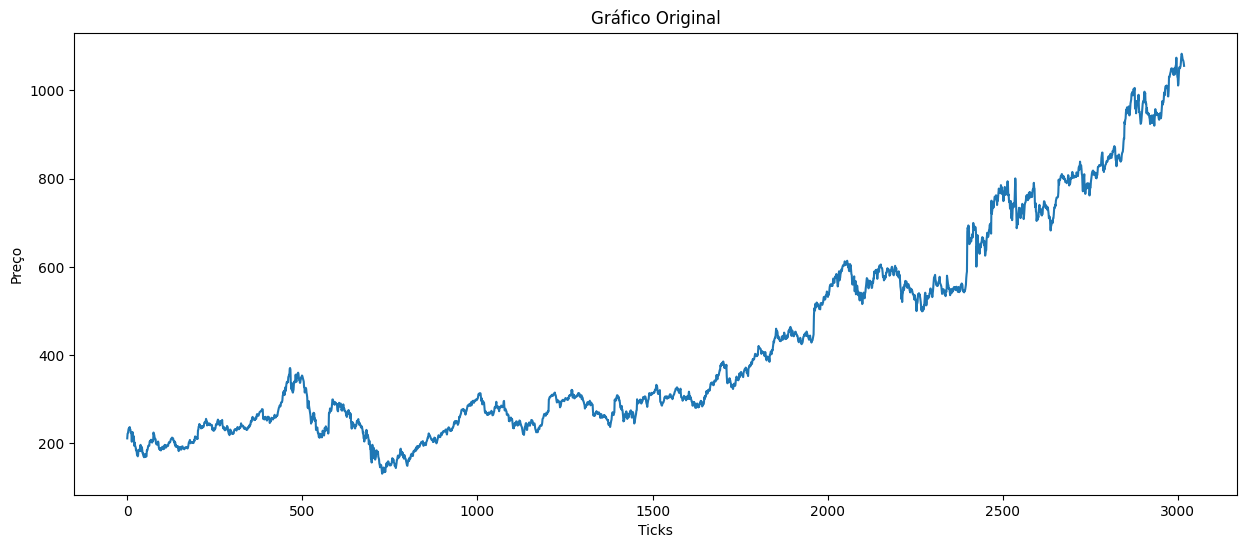

In [18]:
# gráfico baseado em ticks - usamos Open
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Gráfico Original')
ax1.plot('Ticks', 'Open', data = g_stk);

In [19]:
g_stk = g_stk.copy()
#média móvel 
g_stk['Rolling_Mean'] = g_stk['Open'].rolling(window = 80).mean()
g_stk.head(5)

,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1,NaN
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2,NaN
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3,NaN
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4,NaN


In [20]:
#  vamos pegar um intervalo da tabela filtrando por ticks
filt_g = g_stk[(g_stk['Ticks'] >= 900) & (g_stk['Ticks'] <= 1100)]
filt_g.head()

,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2009-07-31,225.21,226.58,221.44,221.75,2861550,GOOGL,900,205.07250
2009-08-03,224.59,227.18,224.04,226.33,2591173,GOOGL,901,205.60575
2009-08-04,224.91,227.23,224.44,227.09,2390098,GOOGL,902,206.10550
2009-08-05,228.23,228.68,224.16,225.80,2342227,GOOGL,903,206.63525
2009-08-06,227.38,227.67,224.49,225.41,2111395,GOOGL,904,207.11925


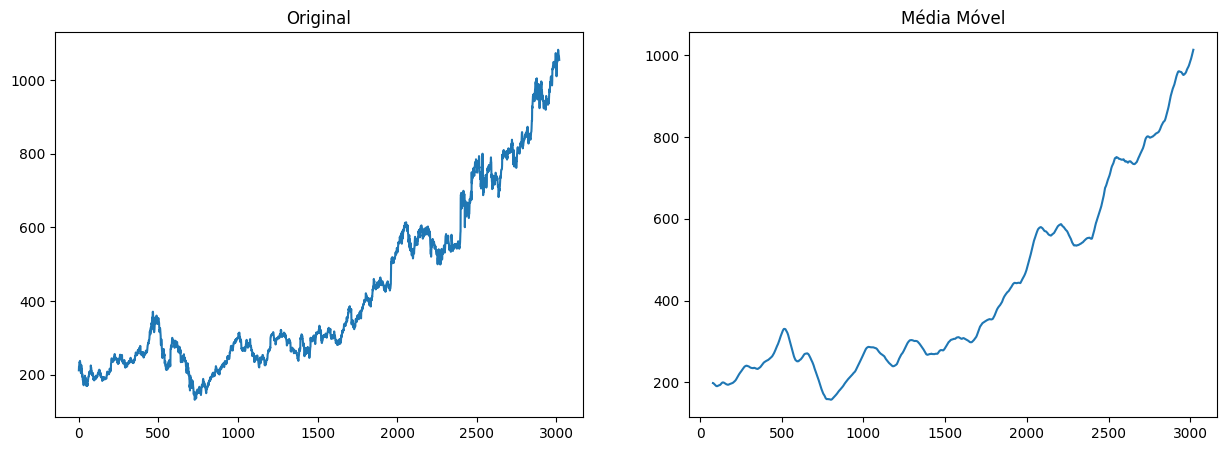

In [21]:
#plotar lado a lado original e média móvel
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('Ticks', 'Open', data = g_stk);
axes[0].set_title('Original');

axes[1].plot('Ticks', 'Rolling_Mean', data = g_stk);
axes[1].set_title('Média Móvel');